In [1]:
from helpers import *
from models import *
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
test_dir = './images/test'
train_dir = './images/train'
m = 'model2'
train_features, train_classes, train_transformed_image_names = read_transform_all_images(train_dir)
test_features, test_classes, test_transformed_image_names = read_transform_all_images(test_dir, False)
try:
    kmeans = joblib.load('./models/aux/kmeans_tf.sav')
except Exception as e:
    print("Could not load Kmeans model. Train first or verify model's name.")
    print(e)
try:
    features = get_test_samples(test_features, kmeans, m).values
    n_samples, n_features = features.shape
    #Encode the labels, TODO: get #classes.
    enc = OneHotEncoder(43)
    labels = enc.fit_transform(test_classes.reshape(-1, 1)).todense()
    _, n_classes = labels.shape

    tf.reset_default_graph()

    # TF input
    x = tf.placeholder("float", [None, n_features]) # Based on Kmeans, there are inputs are of shape k
    y = tf.placeholder("float", [None, n_classes]) # 43 classes.

    # Define variables to restore
    W = tf.Variable(tf.zeros([n_features, n_classes]))
    b = tf.Variable(tf.zeros([n_classes]))
    saver = tf.train.Saver()

    with tf.Session() as sess:
        model = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
        predictions = tf.argmax(model, 1)
        try:
            #Restore the model
            saver.restore(sess, "./models/%s/%s.ckpt" %(m, m))
            #Run predictions
            preds = sess.run(predictions, feed_dict = {x: features})
        except Exception as e: 
            print('Error using %s. Train first.' %m)
            print(e)
except:
    print("Could not load tf logistic regression model. Train first.")


INFO:tensorflow:Restoring parameters from ./models/model2/model2.ckpt


The same analysis from model1, I just wanted to emphasize that the SIFT algorithm looks for keypoints and the descriptors of those keypoints could be similar in images with the same figure but in a diferent position or rotation. For example the give way sign is a triangle with one of its sides totally horizontal in the upper part of the image and the bicycle crossing sign its the same but with a side in the lower part (and obviously with a bicycle inside) but The give way sign is far more represented in the training set with 66 samples. The bicycle class has 3. The algorithm with similar features will work towards classifying those 66 samples correct rather than the other 3. And this same phenomenon occurs with the give way class and other classes.

In [3]:
training_data = pd.DataFrame(data=[train_classes, train_transformed_image_names]).T
training_data.columns = ['real', 'image_name']

In [4]:
preds_data = pd.DataFrame(data= [preds, test_classes, test_transformed_image_names]).T
preds_data.columns = ['pred', 'real', 'img_name']

In [11]:
print(classification_report(list(preds_data['real'].values), list(preds_data['pred'].values)))

             precision    recall  f1-score   support

          1       0.78      0.88      0.82        16
          2       0.62      0.94      0.74        17
          3       0.86      0.75      0.80         8
          4       0.38      0.50      0.43         6
          5       0.83      0.62      0.71         8
          6       0.75      1.00      0.86         3
          7       0.75      0.86      0.80         7
          8       0.71      0.45      0.56        11
          9       0.86      0.75      0.80         8
         10       0.94      0.83      0.88        18
         11       0.86      0.75      0.80         8
         12       0.93      0.82      0.87        17
         13       0.61      0.93      0.74        15
         14       1.00      1.00      1.00         2
         15       1.00      0.25      0.40         4
         16       1.00      0.50      0.67         2
         17       1.00      1.00      1.00         2
         18       0.50      1.00      0.67   

/Users/juandanielmorales/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


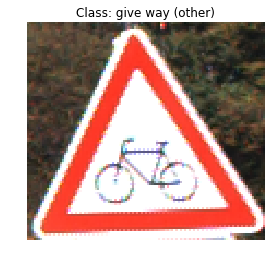

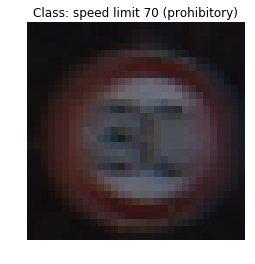

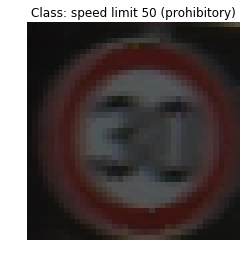

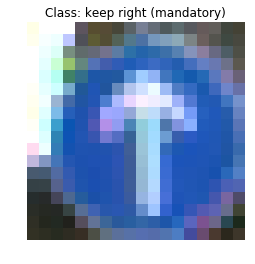

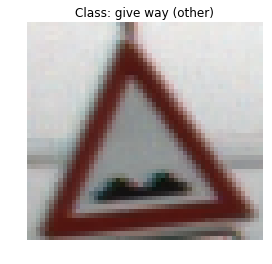

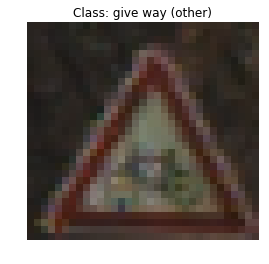

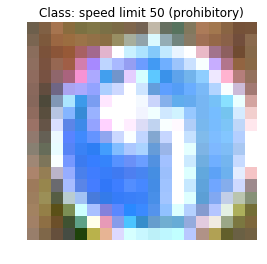

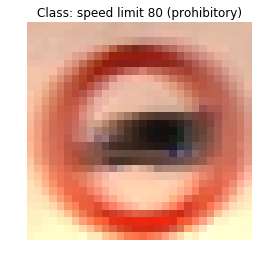

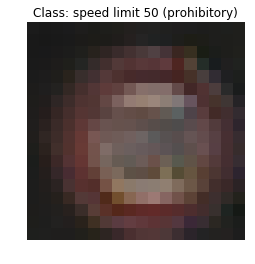

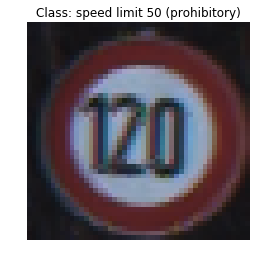

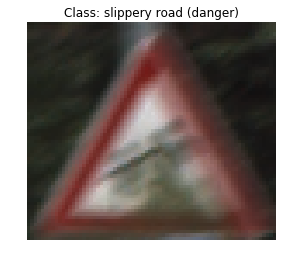

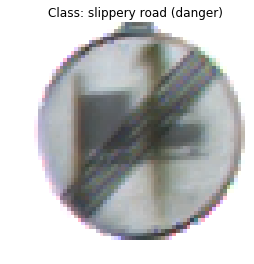

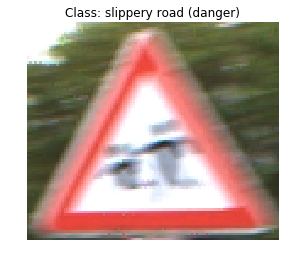

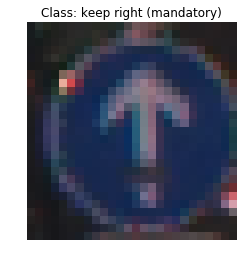

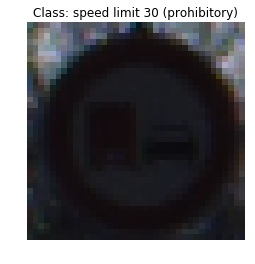

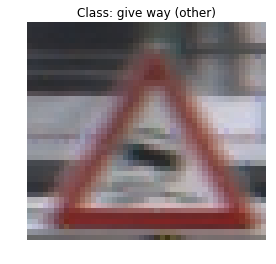

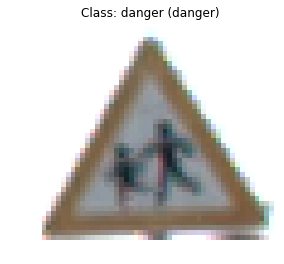

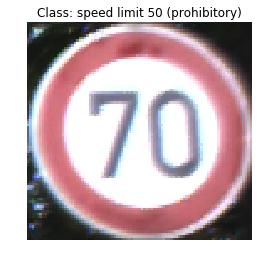

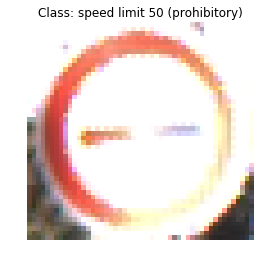

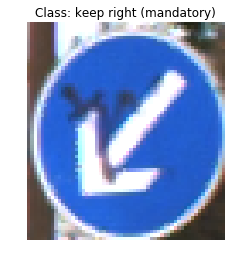

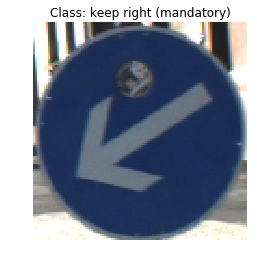

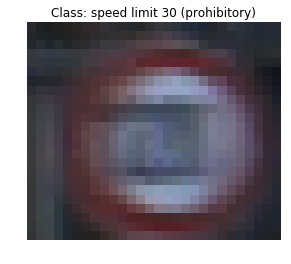

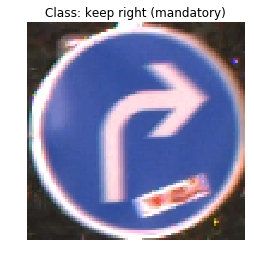

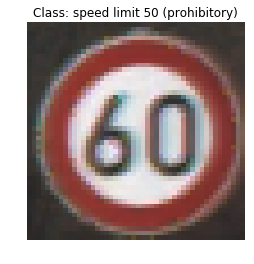

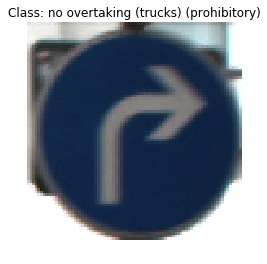

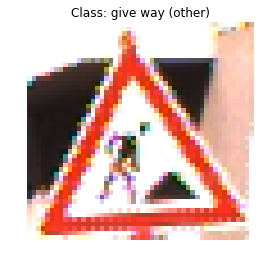

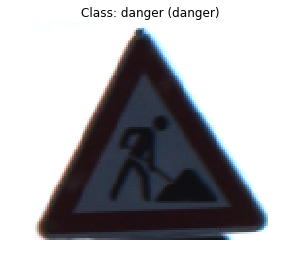

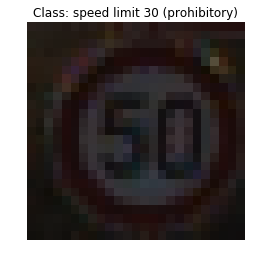

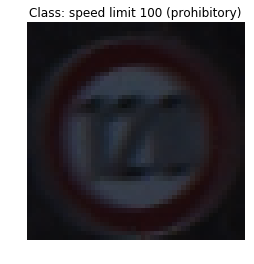

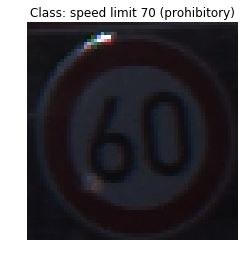

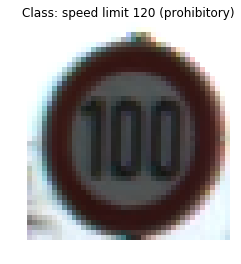

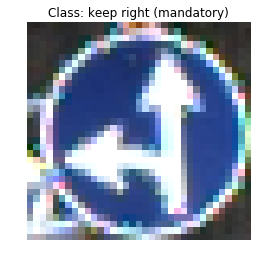

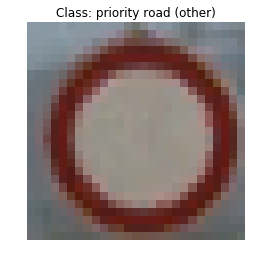

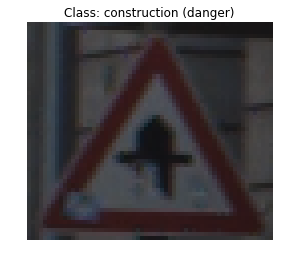

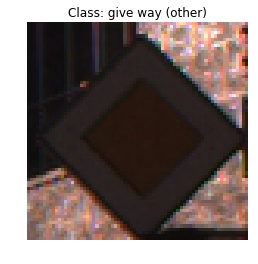

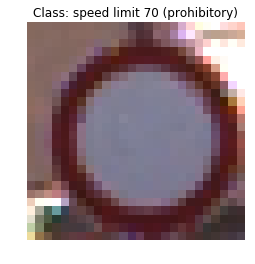

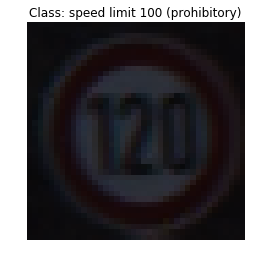

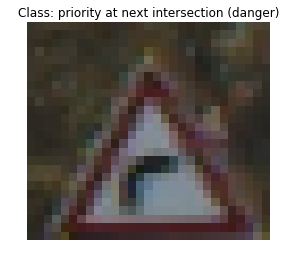

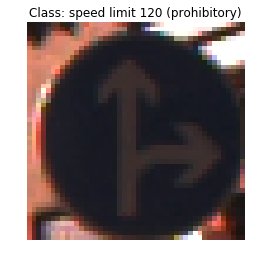

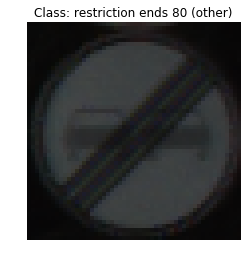

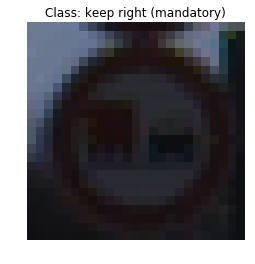

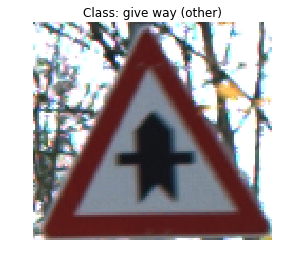

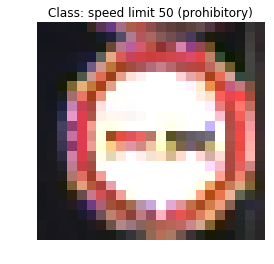

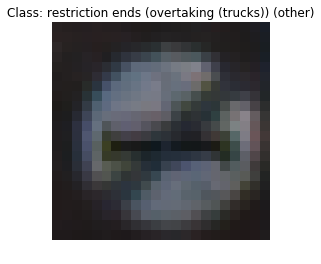

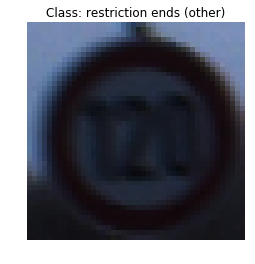

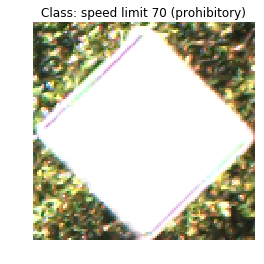

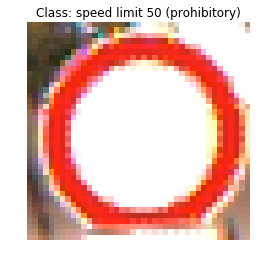

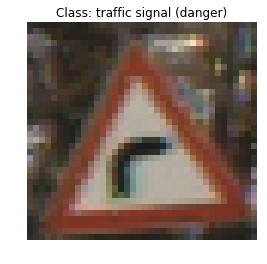

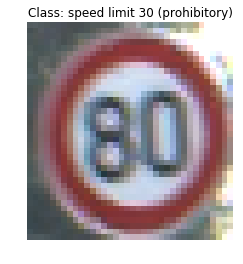

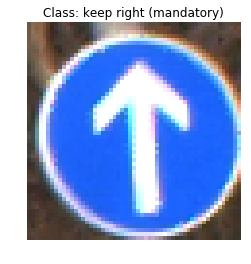

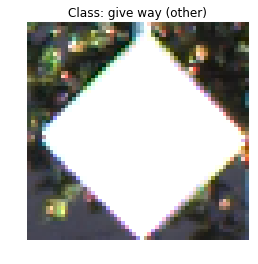

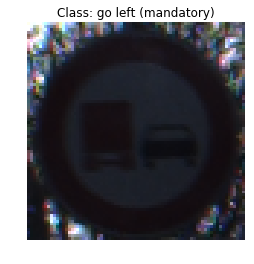

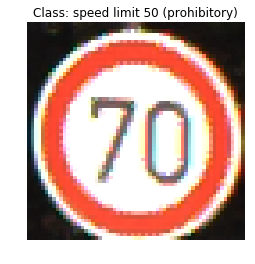

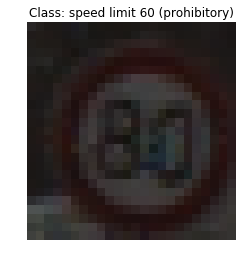

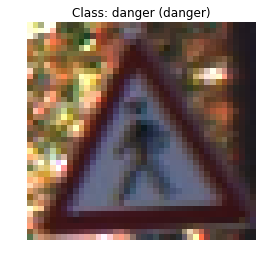

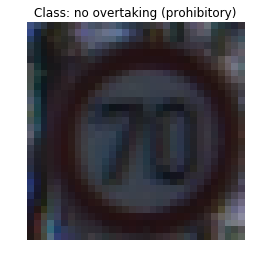

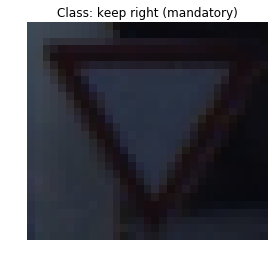

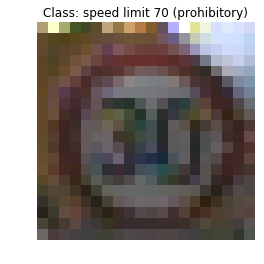

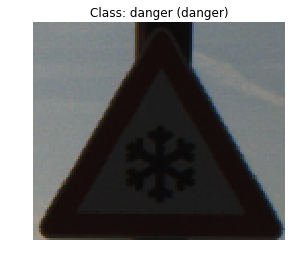

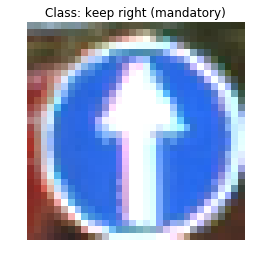

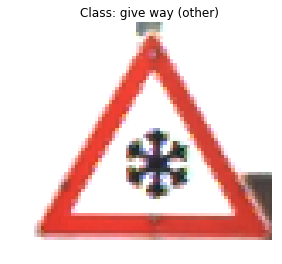

In [9]:
incorrect_preds_slice = preds_data[preds_data['pred'] != preds_data['real']].iloc[:]
show_predictions(incorrect_preds_slice['pred'].values, './images/test', incorrect_preds_slice['img_name'])

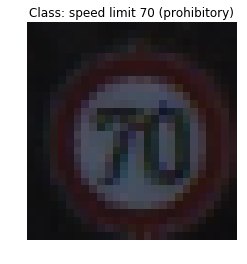

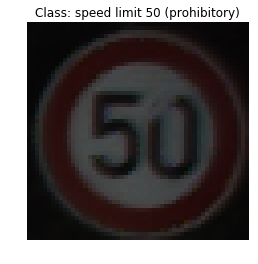

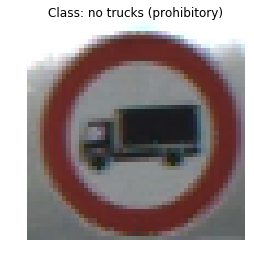

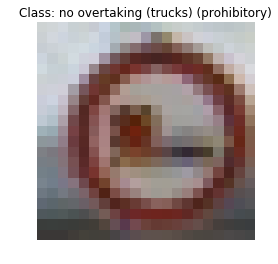

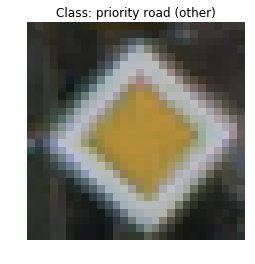

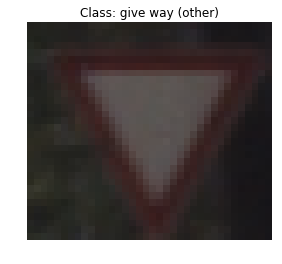

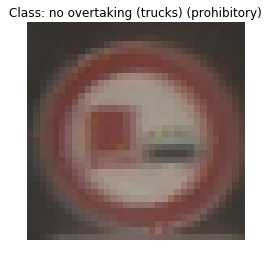

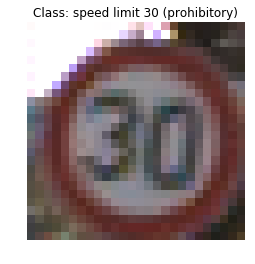

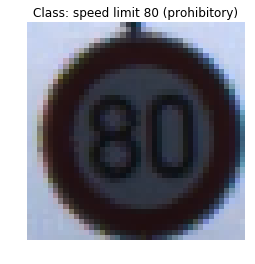

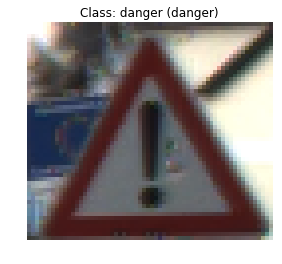

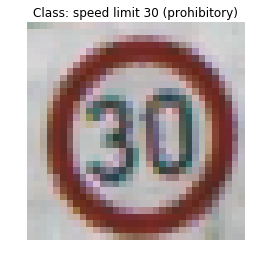

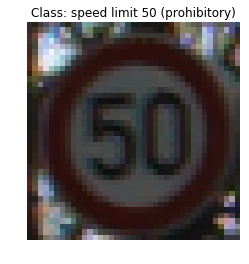

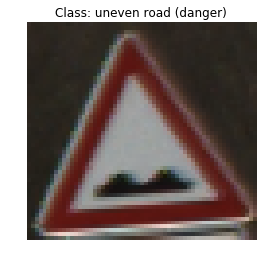

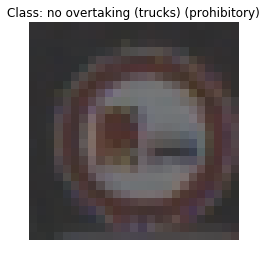

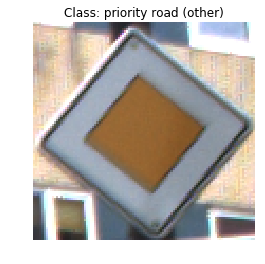

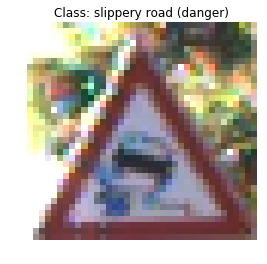

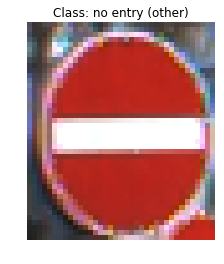

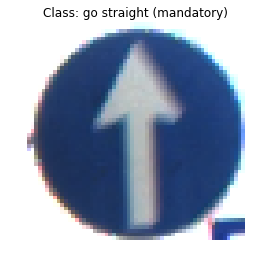

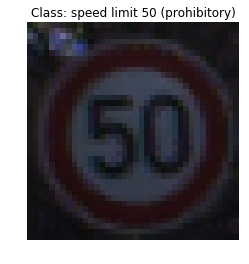

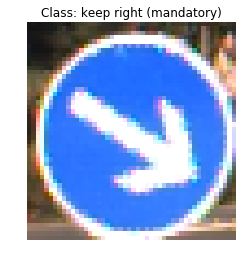

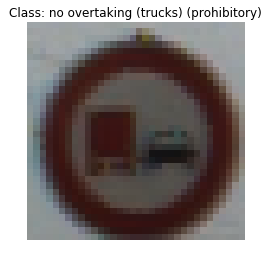

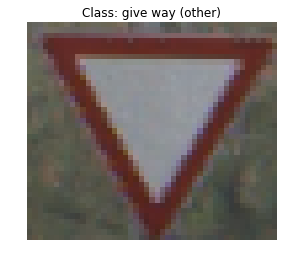

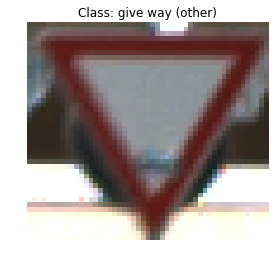

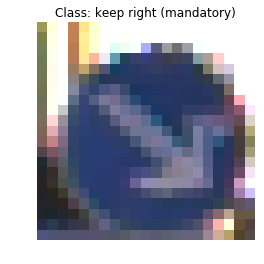

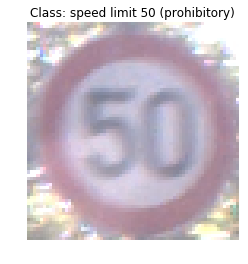

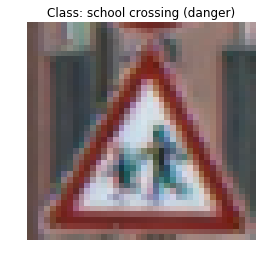

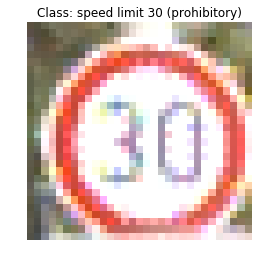

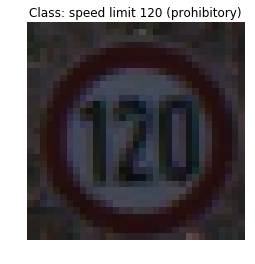

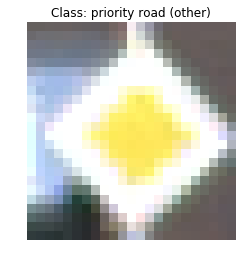

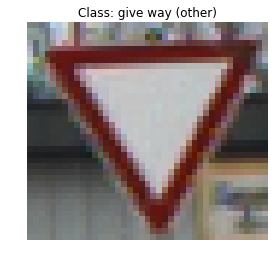

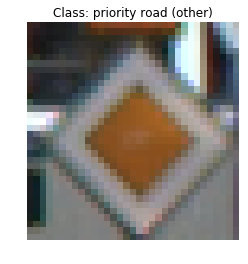

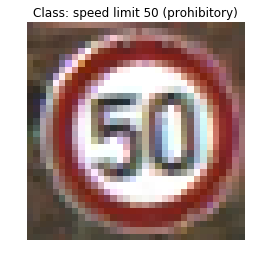

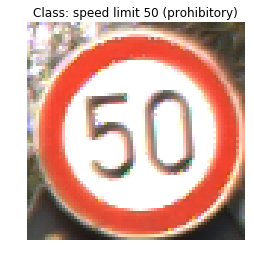

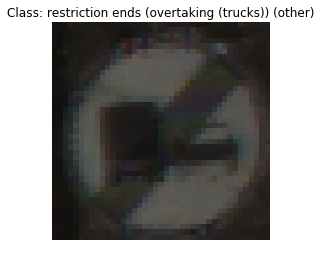

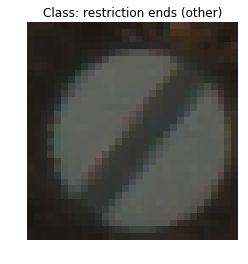

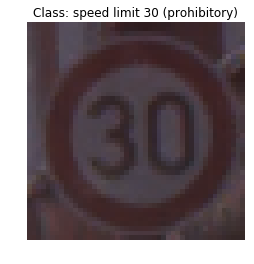

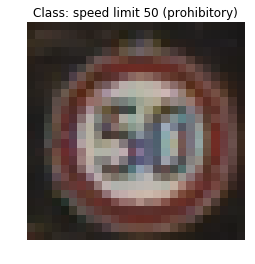

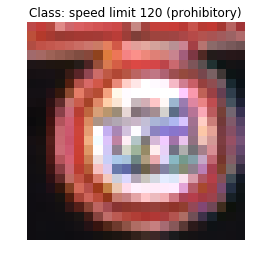

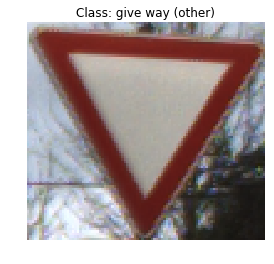

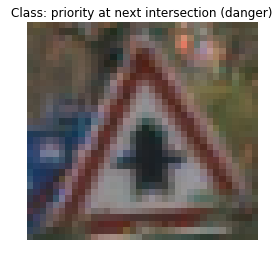

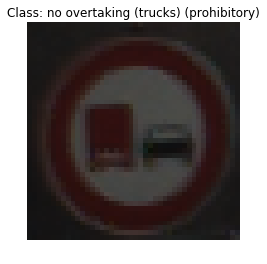

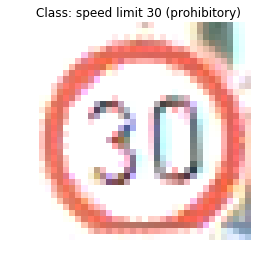

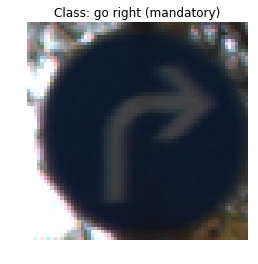

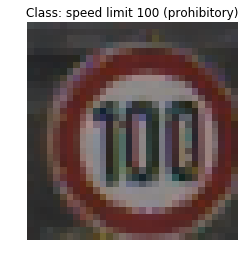

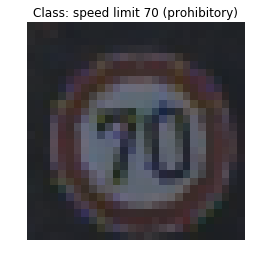

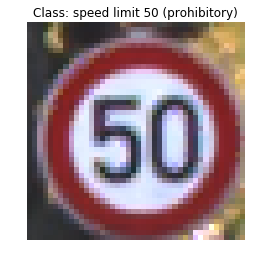

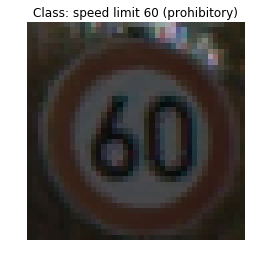

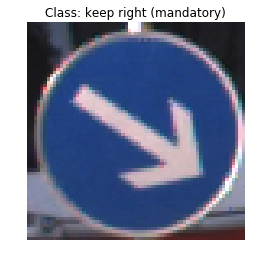

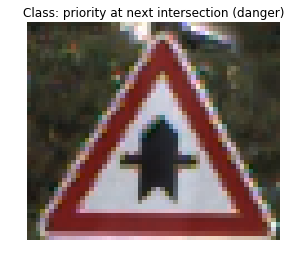

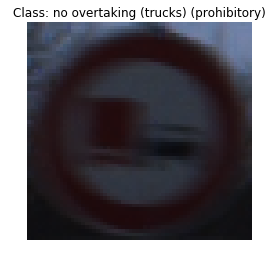

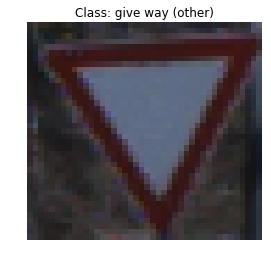

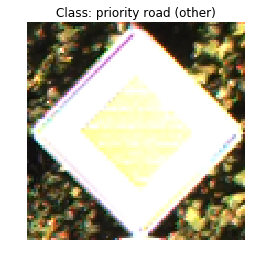

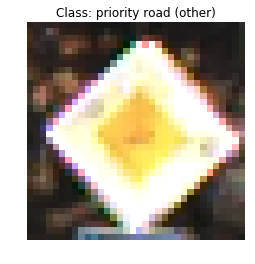

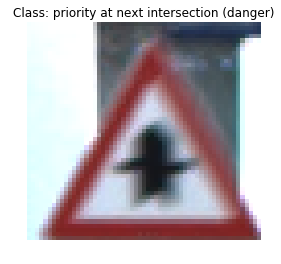

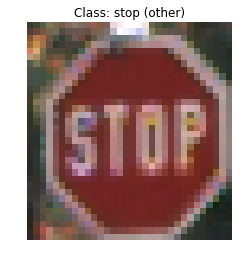

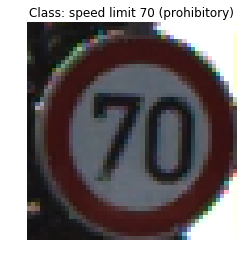

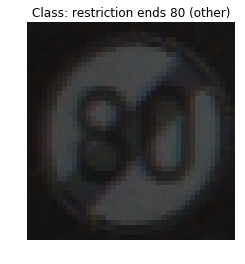

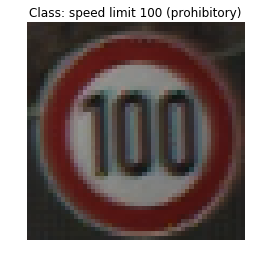

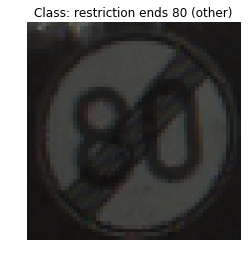

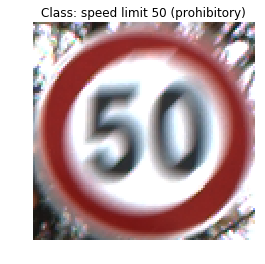

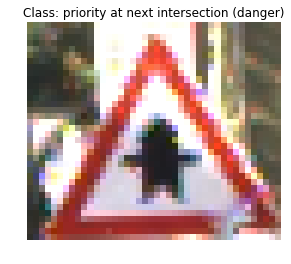

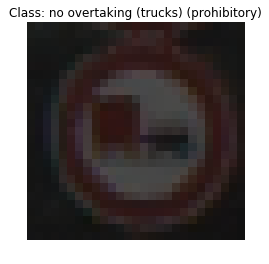

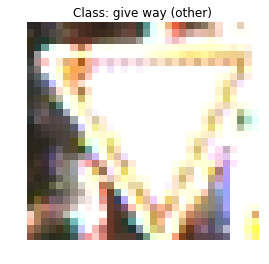

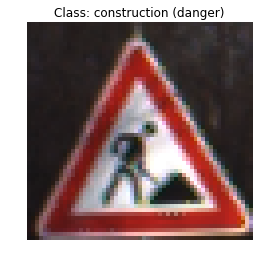

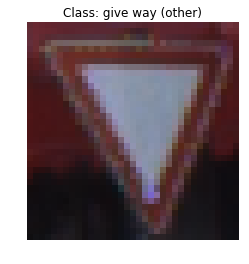

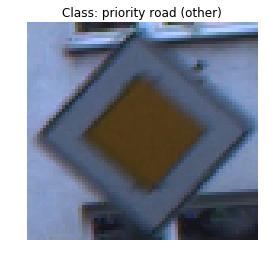

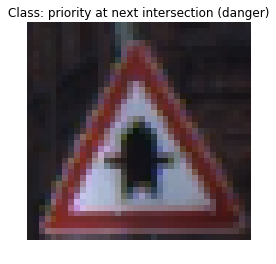

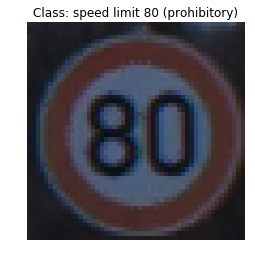

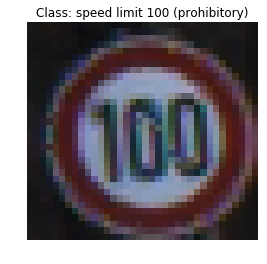

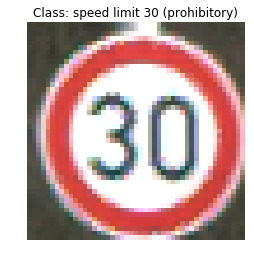

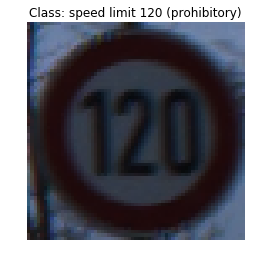

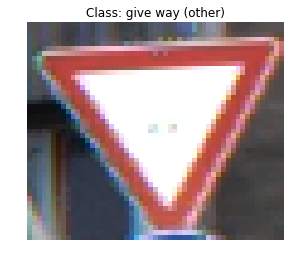

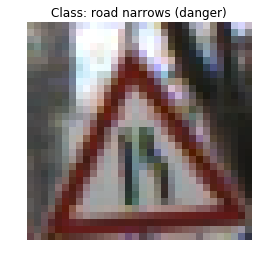

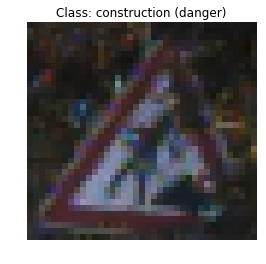

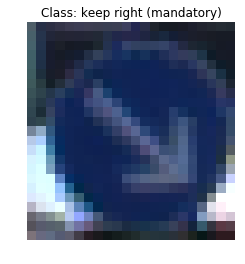

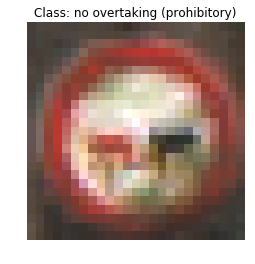

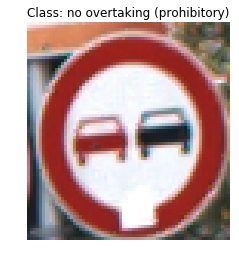

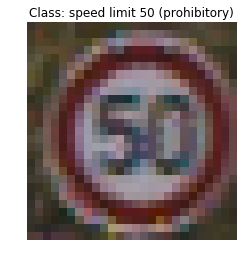

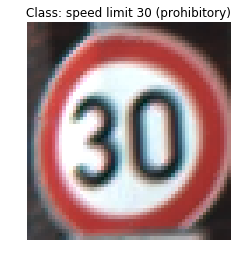

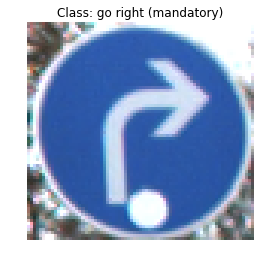

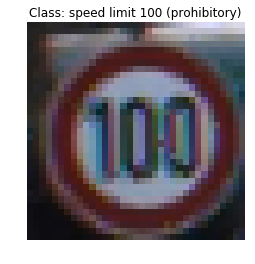

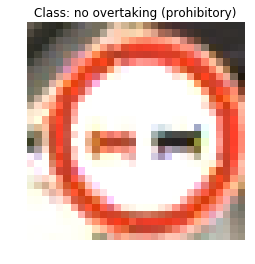

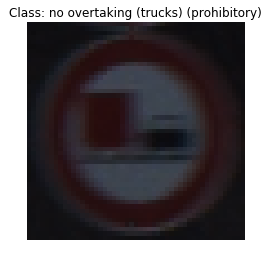

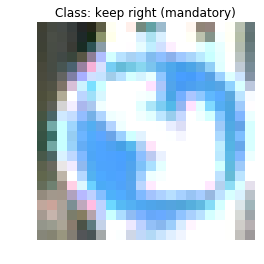

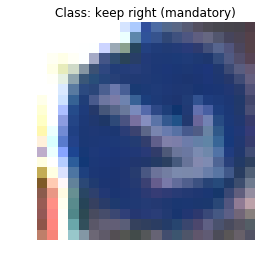

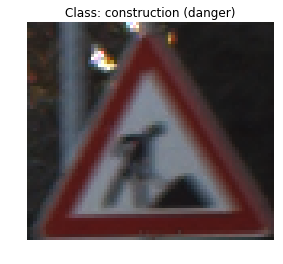

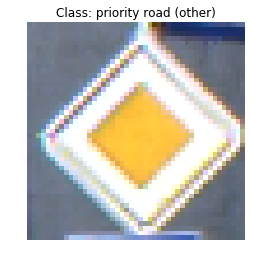

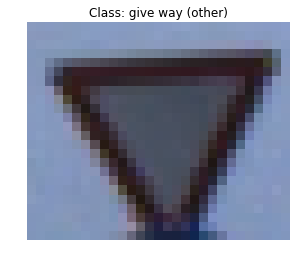

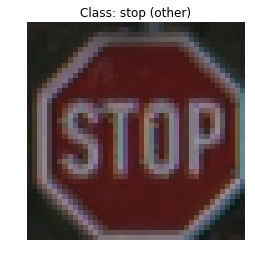

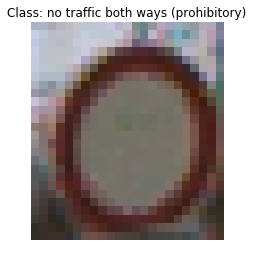

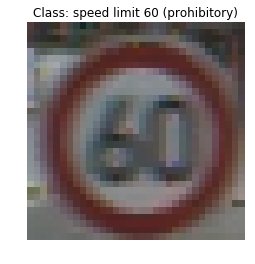

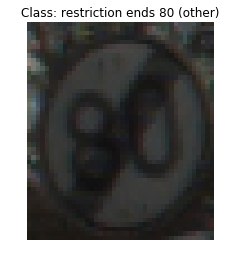

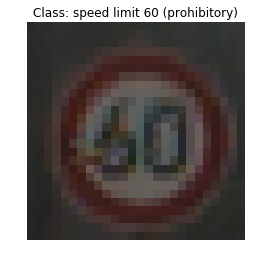

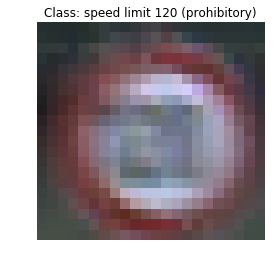

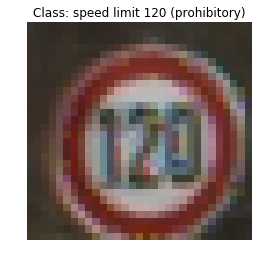

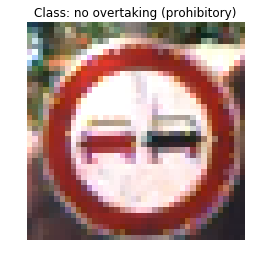

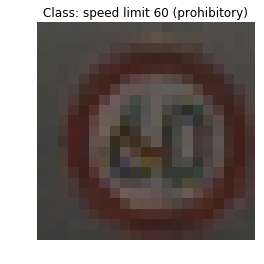

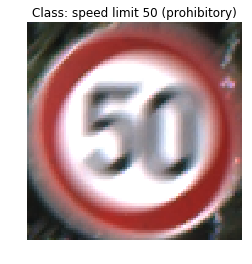

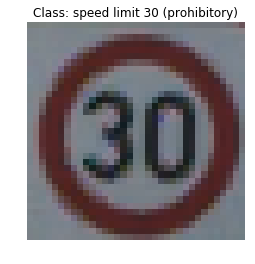

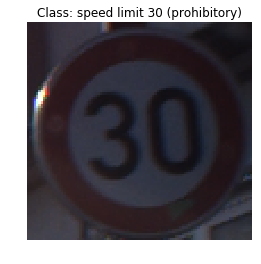

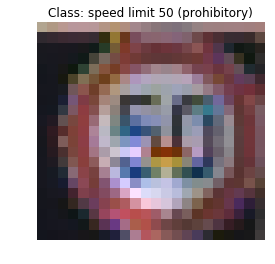

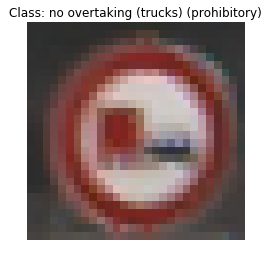

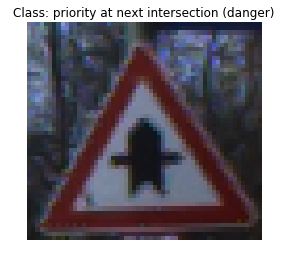

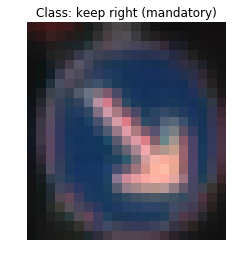

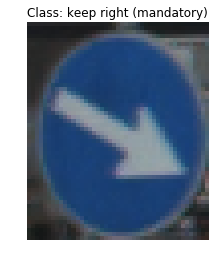

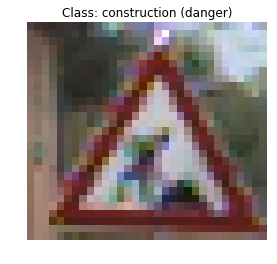

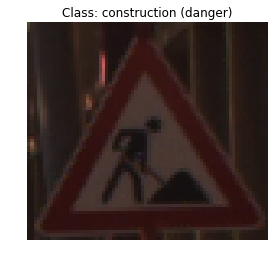

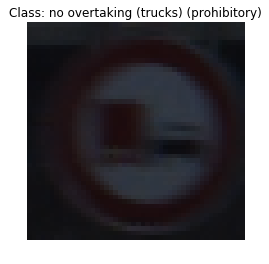

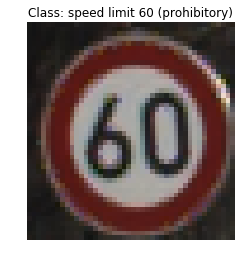

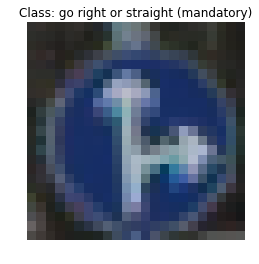

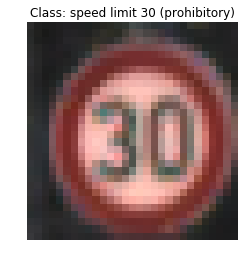

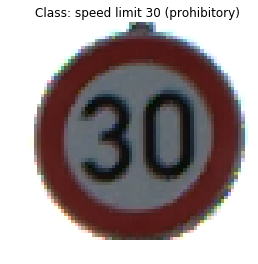

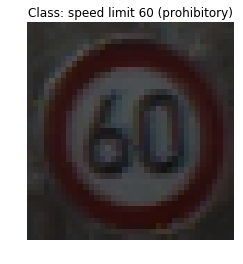

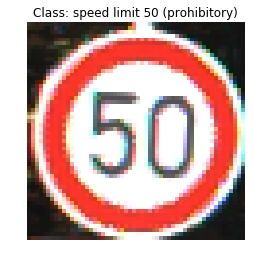

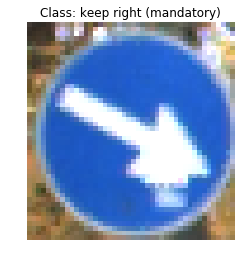

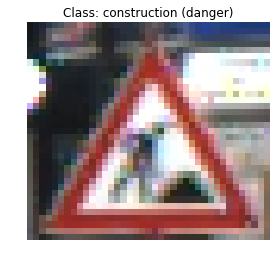

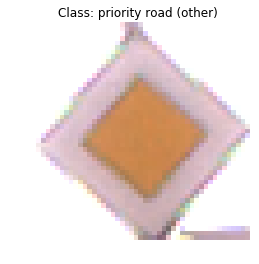

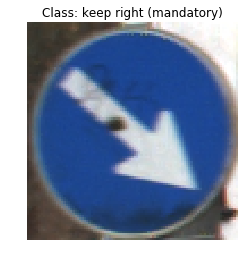

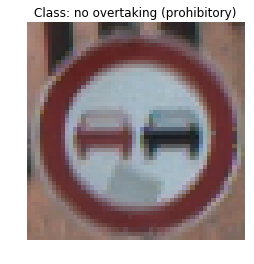

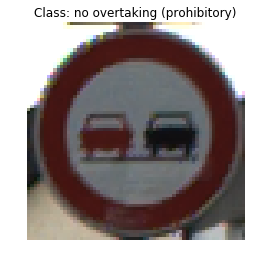

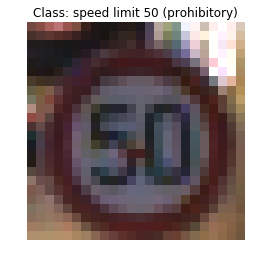

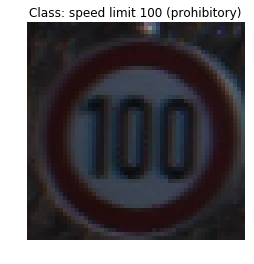

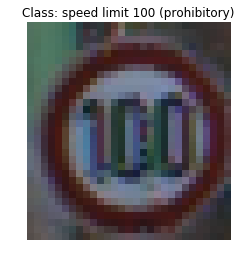

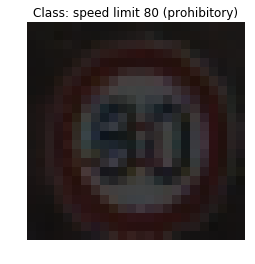

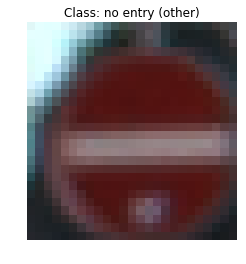

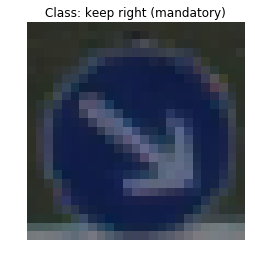

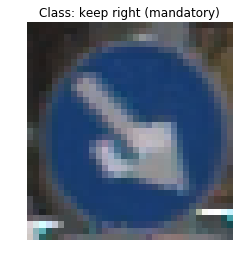

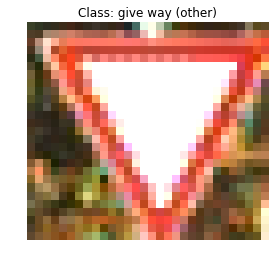

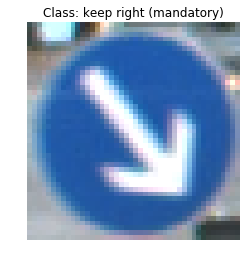

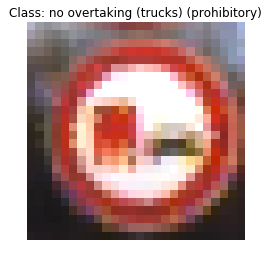

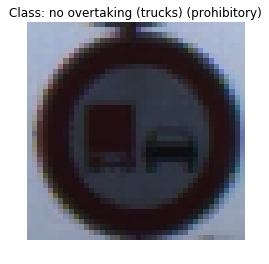

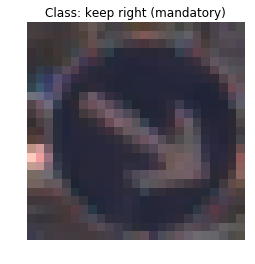

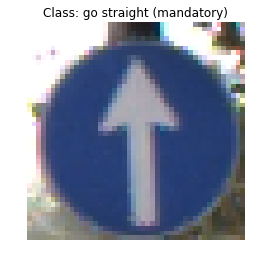

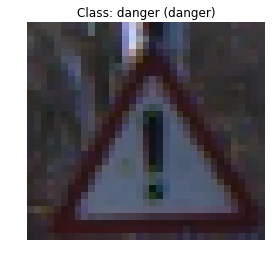

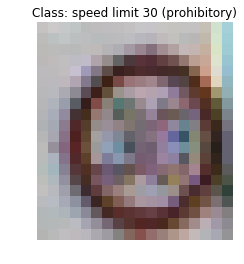

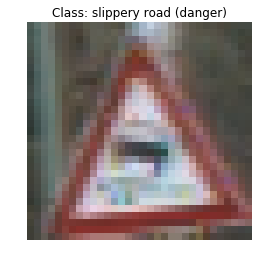

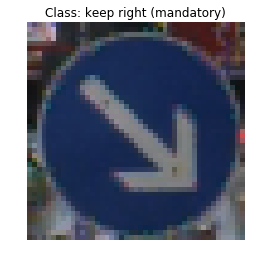

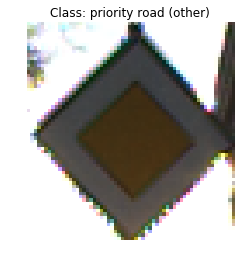

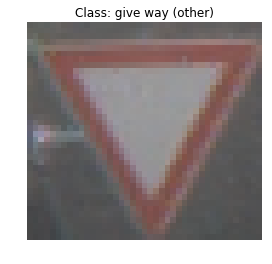

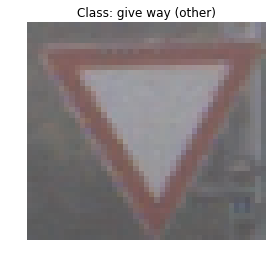

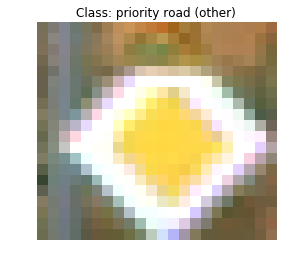

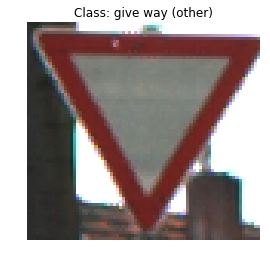

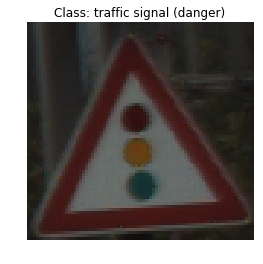

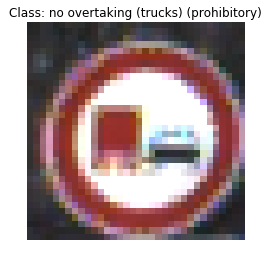

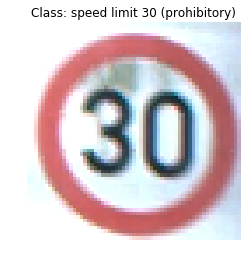

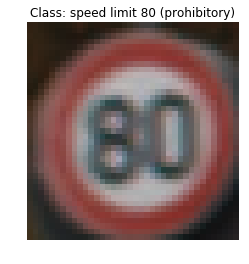

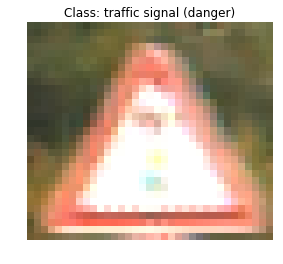

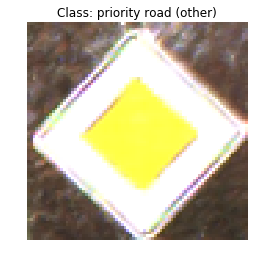

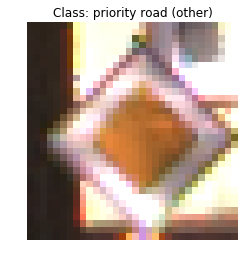

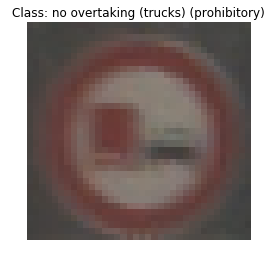

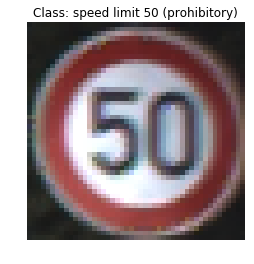

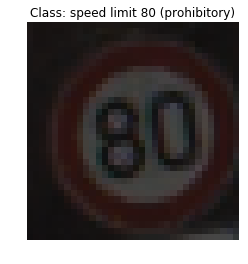

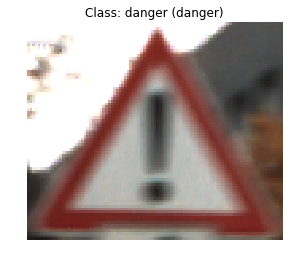

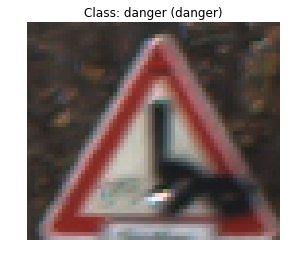

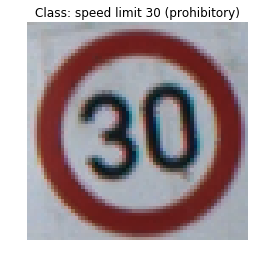

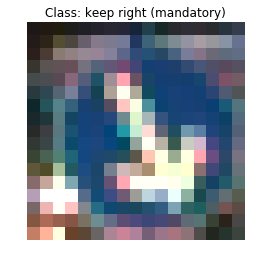

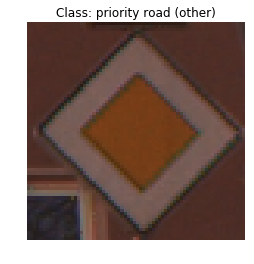

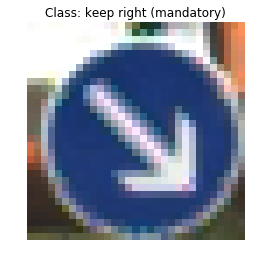

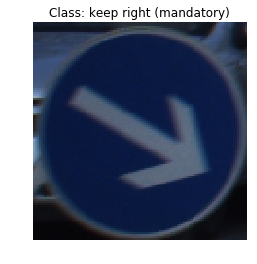

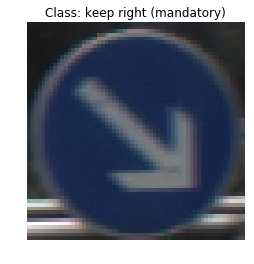

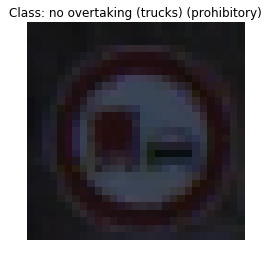

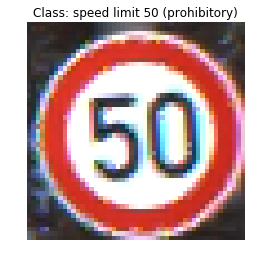

In [10]:
correct_preds_slice = preds_data[preds_data['pred'] == preds_data['real']].iloc[:]
show_predictions(correct_preds_slice['pred'].values, './images/test', correct_preds_slice['img_name'])